In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv("Fraud_check.csv")

# Preprocessing
data['Taxable.Income'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
data.drop(['Undergrad', 'Urban'], axis=1, inplace=True)

# Split data into features and target
X = data.drop('Taxable.Income', axis=1)
y = data['Taxable.Income']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables to dummy variables (one-hot encoding)
X_train_encoded = pd.get_dummies(X_train, columns=['Marital.Status'], drop_first=True, prefix_sep='_', prefix='', sparse=False, dtype=None)
X_test_encoded = pd.get_dummies(X_test, columns=['Marital.Status'], drop_first=True, prefix_sep='_', prefix='', sparse=False, dtype=None)

# Ensure that both train and test datasets have the same columns
missing_cols_train = set(X_test_encoded.columns) - set(X_train_encoded.columns)
missing_cols_test = set(X_train_encoded.columns) - set(X_test_encoded.columns)

for col in missing_cols_train:
    X_train_encoded[col] = 0

for col in missing_cols_test:
    X_test_encoded[col] = 0

# Build the Decision Tree Model using the encoded data
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train_encoded, y_train)

# Predictions
train_preds = model.predict(X_train_encoded)
test_preds = model.predict(X_test_encoded)

# Accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Confusion Matrices
train_cm = confusion_matrix(y_train, train_preds)
test_cm = confusion_matrix(y_test, test_preds)

print("Train Confusion Matrix:")
print(train_cm)
print("Test Confusion Matrix:")
print(test_cm)


Train Accuracy: 1.0
Test Accuracy: 0.65
Train Confusion Matrix:
[[382   0]
 [  0  98]]
Test Confusion Matrix:
[[73 21]
 [21  5]]


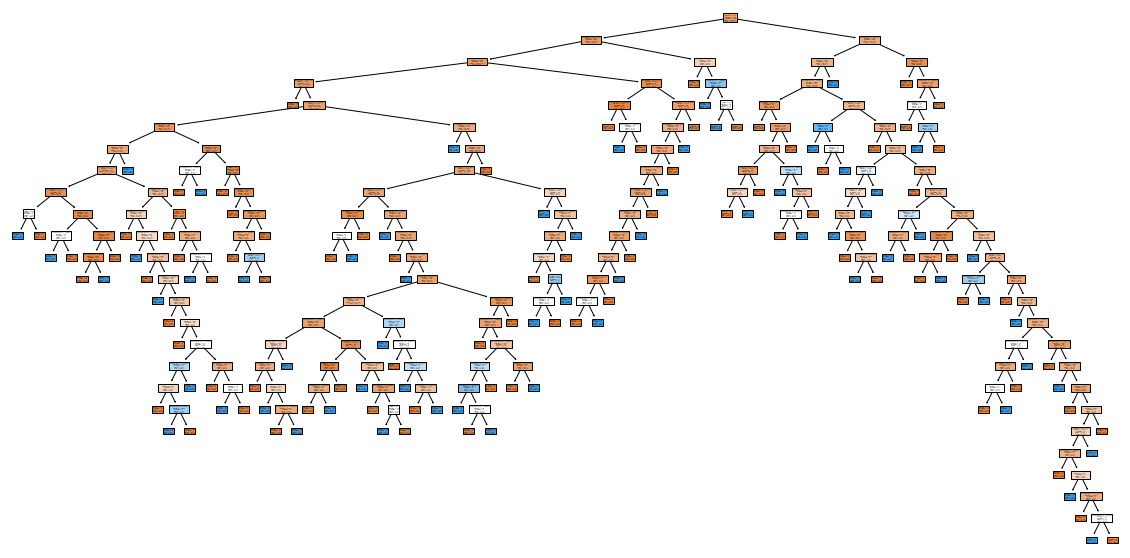

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Build the Decision Tree Model using the encoded data
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train_encoded, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train_encoded.columns, class_names=model.classes_, filled=True)
plt.show()


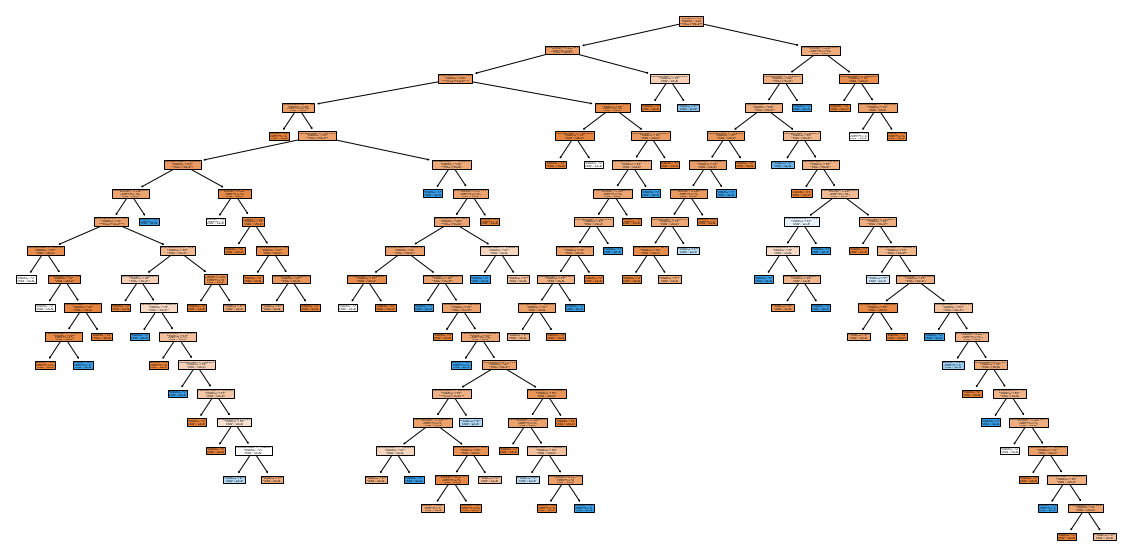

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Build the Decision Tree Model using the encoded data with minimum samples before split specified
model = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
model.fit(X_train_encoded, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train_encoded.columns, class_names=model.classes_, filled=True)
plt.show()


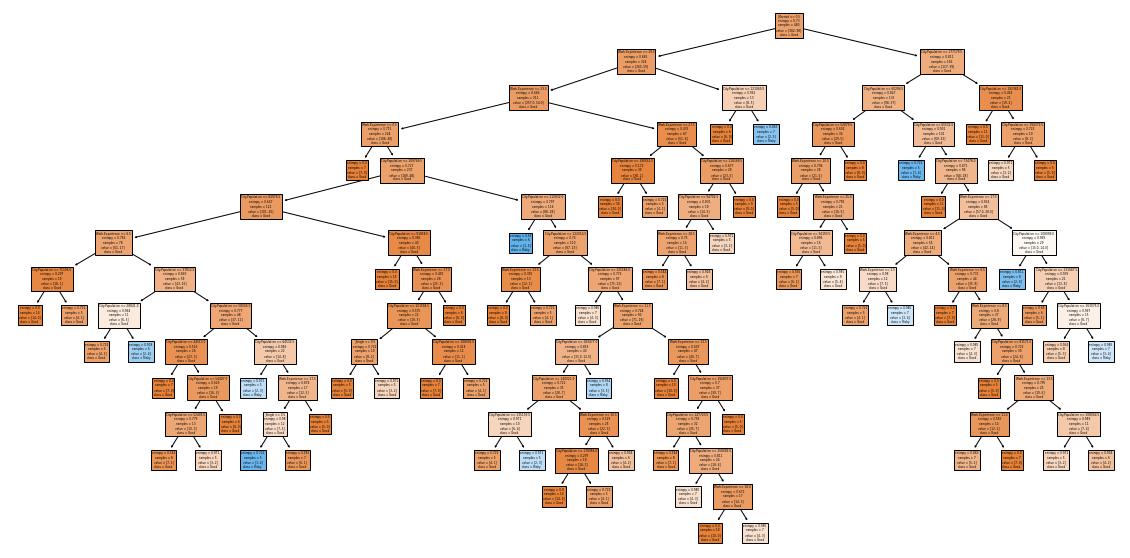

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Build the Decision Tree Model using the encoded data with minimum samples in leaf node specified
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)
model.fit(X_train_encoded, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train_encoded.columns, class_names=model.classes_, filled=True)
plt.show()


Best Parameters: {'criterion': 'entropy', 'min_samples_leaf': 8, 'min_samples_split': 2}


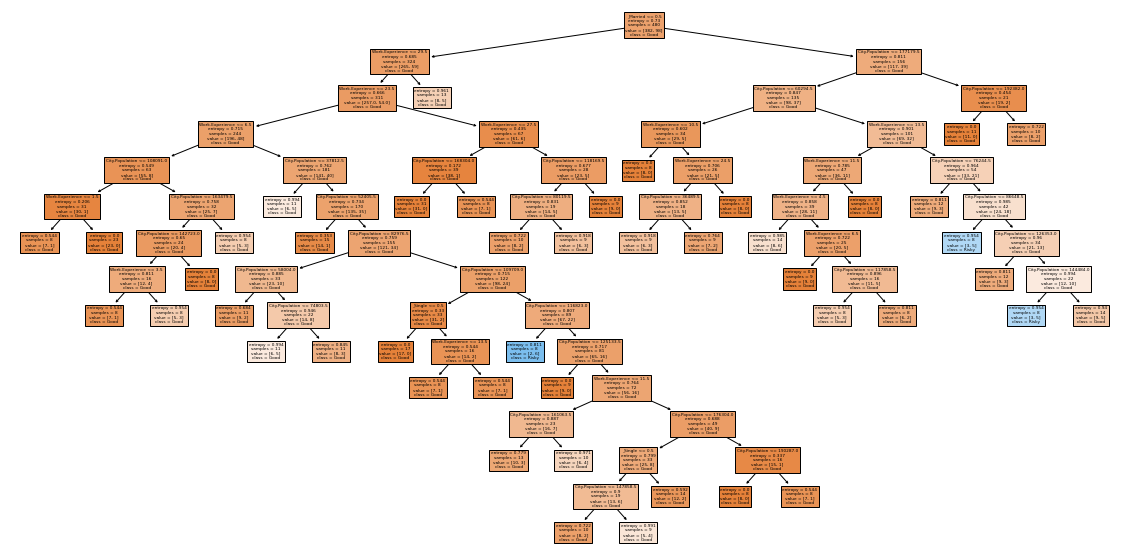

In [25]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'criterion': ['entropy'],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_encoded, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Plot the best decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X_train_encoded.columns, class_names=best_model.classes_, filled=True)
plt.show()


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


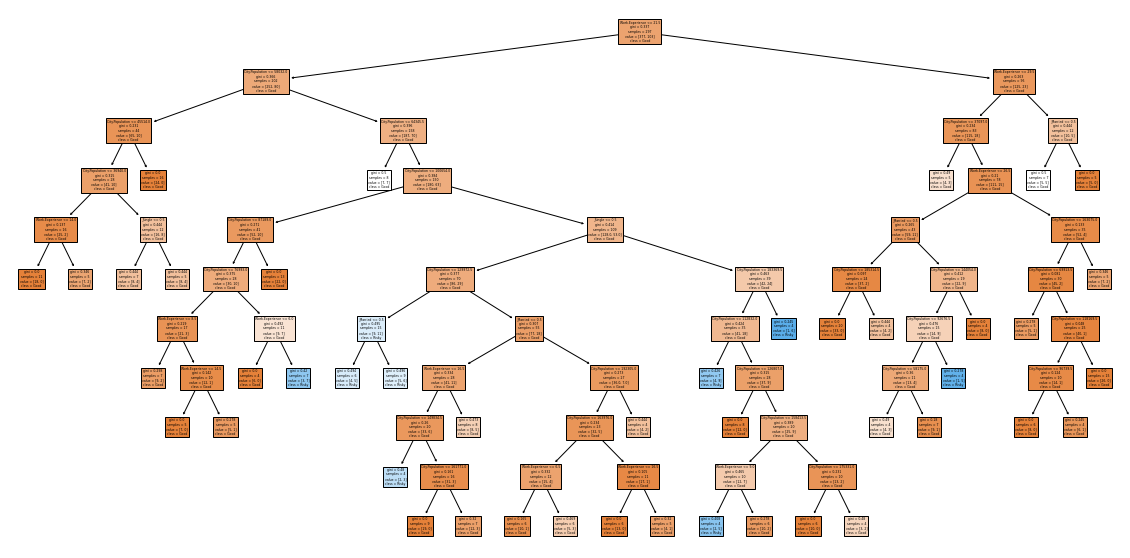

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

# Random Forest classification
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_encoded, y_train)

# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train)

# Get the best Random Forest model
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Plot decision tree for the best Random Forest model
best_rf_tree = best_rf_model.estimators_[0]  # Extracting one tree from the forest
plt.figure(figsize=(20,10))
plot_tree(best_rf_tree, feature_names=X_train_encoded.columns, class_names=best_rf_model.classes_, filled=True)
plt.show()
